In [1]:
import numpy as np
import pandas as pd
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# 資料描述
---
#### Abstract: This dataset is a heart disease database similar to a database already present in the repository (Heart Disease databases) but in a slightly different form

### 判斷是否有心臟方面的疾病




### 欄位描述
---
-- 1. age 

-- 2. sex 

-- 3. chest pain type (4 values) 

-- 4. resting blood pressure 

-- 5. serum cholestoral in mg/dl 

-- 6. fasting blood sugar > 120 mg/dl 

-- 7. resting electrocardiographic results (values 0,1,2) 

-- 8. maximum heart rate achieved 

-- 9. exercise induced angina 

-- 10. oldpeak = ST depression induced by exercise relative to rest 

-- 11. the slope of the peak exercise ST segment 

-- 12. number of major vessels (0-3) colored by flourosopy 

-- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 


In [2]:
header = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
          'serum_cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic_results', 
          'heart_rate', 'exercise_induced_angina', 'oldpeak', 'ST', 'vessels', 'thal', 'Absence']
df = pd.read_csv('heart.dat', sep=' ', names=header)

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,heart_rate,exercise_induced_angina,oldpeak,ST,vessels,thal,Absence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age                                     270 non-null float64
sex                                     270 non-null float64
chest_pain_type                         270 non-null float64
resting_blood_pressure                  270 non-null float64
serum_cholestoral                       270 non-null float64
fasting_blood_sugar                     270 non-null float64
resting_electrocardiographic_results    270 non-null float64
heart_rate                              270 non-null float64
exercise_induced_angina                 270 non-null float64
oldpeak                                 270 non-null float64
ST                                      270 non-null float64
vessels                                 270 non-null float64
thal                                    270 non-null float64
Absence                                 270 non-null int64
dtypes: float64(13), int64(1)
memory usage:

In [4]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,heart_rate,exercise_induced_angina,oldpeak,ST,vessels,thal,Absence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [5]:
y = df.pop('Absence')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
age                                     270 non-null float64
sex                                     270 non-null float64
chest_pain_type                         270 non-null float64
resting_blood_pressure                  270 non-null float64
serum_cholestoral                       270 non-null float64
fasting_blood_sugar                     270 non-null float64
resting_electrocardiographic_results    270 non-null float64
heart_rate                              270 non-null float64
exercise_induced_angina                 270 non-null float64
oldpeak                                 270 non-null float64
ST                                      270 non-null float64
vessels                                 270 non-null float64
thal                                    270 non-null float64
dtypes: float64(13)
memory usage: 27.5 KB


# 資料切分
---
## 總比數270
### 切分80/20 做訓練與測試用
##### 訓練集 189筆、測試集81筆

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=4)
print("Train DataSet:", X_train.shape[0], ", Test DataSet:", X_test.shape[0])

Train DataSet: 189 , Test DataSet: 81


# KNN
---
### K = 3

In [8]:
k = 3
KNN = KNeighborsClassifier(n_neighbors=k)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [9]:
print("Train accuracy %.2f" % (KNN.score(X_train, y_train)*100))
print("Test accuracy  %.2f" % (KNN.score(X_test, y_test)*100))

Train accuracy 83.07
Test accuracy  58.02


In [10]:
K_log = []
train_log = []
val_log = []
for k in range(1, 30, 4):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    print("K={}".format(k))
    print("="*30)
    print("Train accuracy %.2f ％" % (KNN.score(X_train, y_train)*100))
    print("Test accuracy  %.2f ％" % (KNN.score(X_test, y_test)*100))
    print()
    K_log.append(k)
    train_log.append(KNN.score(X_train, y_train)*100)
    val_log.append(KNN.score(X_test, y_test)*100)

K=1
Train accuracy 100.00 ％
Test accuracy  53.09 ％

K=5
Train accuracy 78.31 ％
Test accuracy  54.32 ％

K=9
Train accuracy 74.60 ％
Test accuracy  64.20 ％

K=13
Train accuracy 73.54 ％
Test accuracy  65.43 ％

K=17
Train accuracy 74.60 ％
Test accuracy  61.73 ％

K=21
Train accuracy 73.02 ％
Test accuracy  60.49 ％

K=25
Train accuracy 73.54 ％
Test accuracy  58.02 ％

K=29
Train accuracy 68.78 ％
Test accuracy  56.79 ％



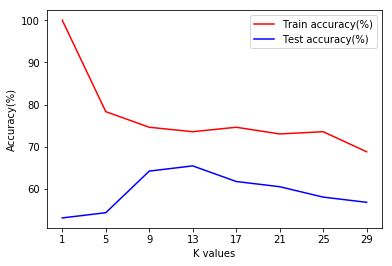

In [12]:
import matplotlib.pyplot as plt 
plt.plot(K_log, train_log, 'r-', label='Train accuracy(%)')
plt.plot(K_log, val_log, 'b-', label='Test accuracy(%)')
plt.legend(loc='upper right')
plt.ylabel('Accuracy(%)')
plt.xlabel('K values')
plt.xticks(K_log)
plt.show()